# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



Aleksandra Pawłowska - part 1 and part 4 of the project

Max Stróżyk - part 2 and part 3 of the project

In [1]:
# general packages 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

# functions scripts
from scripts.load_data import * 
from scripts.analyse_data import *

# paths
PATH_DATA = Path('data') 


In [2]:
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {
    2015: "236", 
    2018: "603",
    2021: "486",
    2024: "582"
}
gios_pm25_file = {
    2015: "2015_PM25_1g.xlsx",
    2018: "2018_PM25_1g.xlsx",
    2021: "2021_PM25_1g.xlsx",
    2024: "2024_PM25_1g.xlsx"
}


In [3]:
df2015_raw = download_gios_archive(2015, gios_url_ids[2015], gios_pm25_file[2015])
df2018_raw = download_gios_archive(2018, gios_url_ids[2018], gios_pm25_file[2018])
df2021_raw = download_gios_archive(2021, gios_url_ids[2021], gios_pm25_file[2021])
df2024_raw = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

In [4]:
df2015 = clean_gios_data2(df2015_raw)
df2018 = clean_gios_data2(df2018_raw)
df2021 = clean_gios_data2(df2021_raw)
df2024 = clean_gios_data2(df2024_raw)

/home/maxi7524/repositories/mini_project_ZTPDB_1/scripts/load_data.py:83: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")
/home/maxi7524/repositories/mini_project_ZTPDB_1/scripts/load_data.py:83: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")


In [5]:
num_stations_2015 = df2015.shape[1] 
num_stations_2018 = df2018.shape[1]  
num_stations_2021 = df2021.shape[1]
num_stations_2024 = df2024.shape[1]
unique_days_shifted = df2015.index.normalize().unique()

num_days_2015 = len(pd.unique(unique_days_shifted))
num_days_2018 = len(pd.unique(df2018.index.date))
num_days_2021 = len(pd.unique(df2021.index.date))
num_days_2024 = len(pd.unique(df2024.index.date))

print(f"Number of days in 2015: {num_days_2015}")
print(f"Number of days in 2018: {num_days_2018}")
print(f"Number of days in 2021: {num_days_2021}")
print(f"Number of days in 2024: {num_days_2024}")

print(f"\nNumber of stations in 2015: {num_stations_2015}")
print(f"Number of stations in 2018: {num_stations_2018}")
print(f"Number of stations in 2021: {num_stations_2021}")
print(f"Number of stations in 2024: {num_stations_2024}")



Number of days in 2015: 365
Number of days in 2018: 365
Number of days in 2021: 365
Number of days in 2024: 366

Number of stations in 2015: 42
Number of stations in 2018: 51
Number of stations in 2021: 88
Number of stations in 2024: 96


In [6]:
# Finding common stations
df2015 = clean_column_names(df2015)
df2018 = clean_column_names(df2018)
df2021 = clean_column_names(df2021)
df2024 = clean_column_names(df2024)

print(df2015.columns[:10] + "\n")
print(df2018.columns[:10] + "\n")
print(df2021.columns[:10] + "\n")
print(df2024.columns[:10] + "\n")

mapping = map_old_to_new_codes()
df2015.rename(columns=mapping, inplace=True)
df2018.rename(columns=mapping, inplace=True)
df2021.rename(columns=mapping, inplace=True)
df2024.rename(columns=mapping, inplace=True)

Index(['DsJelGorOgin\n', 'DsWrocAlWisn\n', 'DsWrocWybCon\n', 'KpBydPlPozna\n',
       'KpBydWarszaw\n', 'KpToruDziewu\n', 'LbLubObywate\n', 'LdLodzCzerni\n',
       'LdLodzGdansk\n', 'LdZgieMielcz\n'],
      dtype='object', name=0)
Index(['DsJelGorOgin\n', 'DsWrocAlWisn\n', 'DsWrocWybCon\n', 'KpBydPlPozna\n',
       'KpBydWarszaw\n', 'KpToruDziewu\n', 'KpWloclOkrze\n', 'LbLubObywate\n',
       'LdLodzCzerni\n', 'LdLodzGdansk\n'],
      dtype='object', name=1)
Index(['DsJelGorOgin\n', 'DsKlodzSzkol\n', 'DsMiliczMOB\n', 'DsSrodaSlMOB\n',
       'DsWrocAlWisn\n', 'DsWrocWybCon\n', 'KpBydPlPozna\n', 'KpBydWarszaw\n',
       'KpNaklWawrzy\n', 'KpSolecRowecMOB\n'],
      dtype='object', name=1)
Index(['DsChojnowMalMOB\n', 'DsJelGorOgin\n', 'DsKlodzSzkol\n',
       'DsKudowaSzkoMOB\n', 'DsWrocAlWisn\n', 'DsWrocWybCon\n',
       'KpBydPlPozna\n', 'KpBydWarszaw\n', 'KpNaklWawrzy\n',
       'KpSwiecJPawlMOB\n'],
      dtype='object', name=1)


In [7]:
# Finding common stations
common_stations = list(set(df2015.columns) & set(df2018.columns) & set(df2021.columns) & set(df2024.columns))
print(f"Liczba wspólnych stacji: {len(common_stations)}")

df2015 = df2015[common_stations]
df2018 = df2018[common_stations]
df2021 = df2021[common_stations]
df2024 = df2024[common_stations]

Liczba wspólnych stacji: 30


`Managing NA values`

We did not use `fill_na` function because it led to lack of data in examined stations. To do it properly we would create clusters of stations based on similiar densities of *PM2.5* in different years, then we would fill out missing values by averaging month values in other stations in the same cluster. 

In [28]:
file_name = "PM25_combined_2015_2018_2021_2024.csv"

# combining data
combined = pd.concat([df2015, df2018, df2021, df2024]).sort_index()
combined = combined.dropna(how="all")

combined.index = pd.to_datetime(combined.index)
combined = combined.sort_index()

print(combined.shape)
print(f"\nCombined df starts on: \n{combined.index.min()} \nand ends on: \n{combined.index.max()}")
# combined = fill_na(combined)
combined.to_csv(PATH_DATA / file_name, index=True, date_format="%Y-%m-%d %H:%M:%S")

df = combined

(35064, 30)

Combined df starts on: 
2015-01-01 00:00:00.110000 
and ends on: 
2024-12-31 23:00:00


# Parts 2 and 3

## Results 
From regression plot `Mean PM2.5 concentration in ['Warszawa', 'Katowice']` we can see a significant reduction in PM2.5 concentrations, especially during the heating season.

In the heatmaps, the minimum value was set to $10,\mu\mathrm{g/m^3}$ because this is the target annual limit that EU countries are expected to meet by 2030 [1]. The plots show that the analysed cities do not yet meet this criterion, and the exceedances are particularly high in cities located in the southern part of Poland.

## Analysis
**Limits**

For 2020, the required annual limit for PM2.5 was set at $20,\mu\mathrm{g/m^3}$ [2]. Based on the `heatmaps`, most cities appear to have reached this limit by 2024.

**Reduction**

The most substantial reductions occur during the heating seasons. This is because one of the main sources of PM2.5 in Poland is the combustion of solid fuels in low-quality stoves and old boilers. In recent years many of these have been replaced or phased out, which directly contributes to the observed decline in PM2.5 concentrations [3].


# Bibliography:

[1] [Progress and policies to achieve the zero pollution action plan and EU 2024/2881 PM2.5 targets in Northern Italy](https://www.nature.com/articles/s41598-025-17176-x)

[2] [Poziomy dopuszczalne zanieczyszczeń w powietrzu ze względu na ochronę zdrowia ludzi i ochronę roślin, terminy ich osiągnięcia oraz okresy, dla których uśrednia się wyniki pomiarów - gios.gov.pl](https://powietrze.gios.gov.pl/pjp/content/annual_assessment_air_acceptable_level)

[3] [Dbamy o jakość powietrza w Polsce. Wprowadzamy zmiany w wymaganiach jakościowych dla paliw stałych [ROZPORZĄDZENIE] - gov.pl](https://www.gov.pl/web/klimat/dbamy-o-jakosc-powietrza-w-polsce-wprowadzamy-zmiany-w-wymaganiach-jakosciowych-dla-paliw-stalych-rozporzadzenie)

Part  2

In [31]:
# part with mean values 
time_to_month(df) 

,PmKosTargowa,OpKKozBSmial,DsWrocAlWisn,ZpSzczAndrze,LdLodzCzerni,MzSiedKonars,PdBialUpalna,ZpSzczPilsud,LdZgieMielcz,WmOlsPuszkin,...,MzZyraRoosev,DsWrocWybCon,MzPiasPulask,MzRadTochter,KpBydWarszaw,MzWarWokalna,PmGdaLeczkow,PkPrzemGrunw,SlZlotPotLes,MzLegZegrzyn
Data,,,,,,,,,,,,,,,,,,,,,
2015-01-01,36.803262,31.394930,32.921321,15.459798,27.279348,23.891594,22.464238,21.217074,26.402375,24.267375,...,40.944131,27.863459,35.699318,38.148750,25.890511,23.820244,15.251184,26.429636,20.490547,34.321645
2015-02-01,51.354948,57.073201,45.884722,27.669420,41.245764,44.468838,41.037325,36.168946,44.475336,39.770500,...,65.601905,42.238897,58.695976,60.714142,49.939606,43.573281,21.435362,41.343068,36.671320,62.339970
2015-03-01,33.843097,38.120842,35.995391,23.534377,30.667972,36.035519,30.945504,27.924340,35.808276,29.642556,...,51.063809,32.581978,45.556953,41.123270,24.413016,32.851293,17.027339,41.525408,24.287572,56.189266
2015-04-01,22.013987,21.032000,19.873433,11.757418,15.336890,14.500086,13.426136,15.930986,16.491453,13.321504,...,21.151231,15.131175,23.508647,20.466768,NaN,15.601419,10.397704,15.119868,13.962515,23.671014
2015-05-01,13.261692,15.679388,18.487889,8.544743,12.292181,14.827582,10.741935,11.215703,10.081744,11.356201,...,18.697539,13.339719,19.861911,15.448248,12.668022,14.854559,8.397277,14.765689,11.586400,19.361711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,8.208065,9.262936,11.574059,8.803360,9.851478,NaN,10.822191,12.771909,10.932571,11.946774,...,9.493405,13.286649,9.390591,11.917204,9.179772,8.542896,11.628857,12.971640,11.338575,9.005376
2024-09-01,11.479861,12.187442,13.114571,14.048603,13.984844,NaN,13.641168,16.876111,14.973056,15.639441,...,14.392222,15.856825,13.688842,15.653652,13.917500,12.797986,16.022270,15.655602,13.546314,13.684167
2024-10-01,13.457796,12.995296,15.125575,9.922207,16.039838,NaN,12.582111,16.222581,22.542396,14.791233,...,16.474124,17.468817,15.152221,17.613525,17.466622,14.474684,14.074832,17.301344,13.939651,16.339300


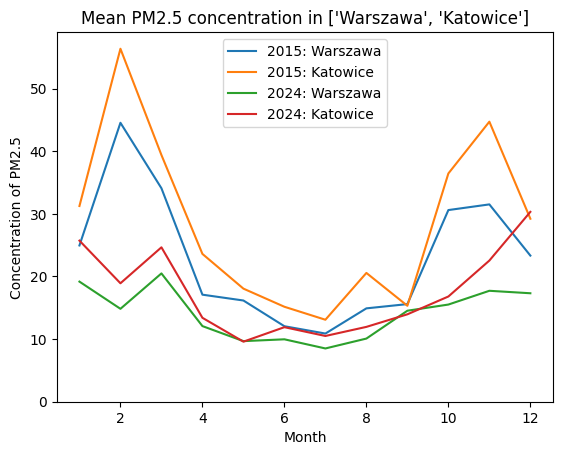

In [33]:
# plot of PM2.5 concentration 
cities = ['Warszawa', 'Katowice']
years = [2015, 2024]
years_trend_cities(df, cities=cities, years=years)

Part 3

There is 25


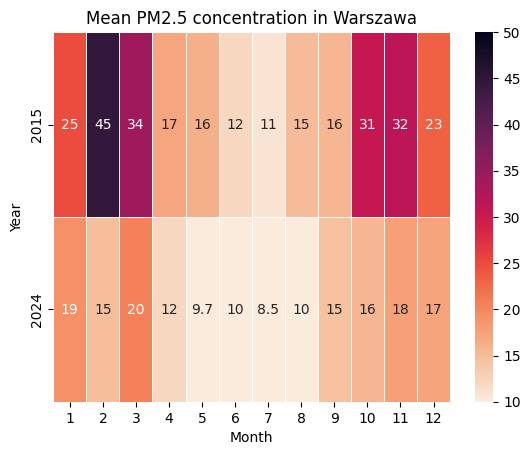

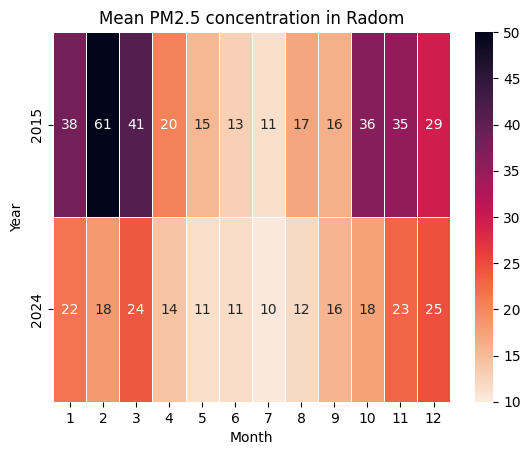

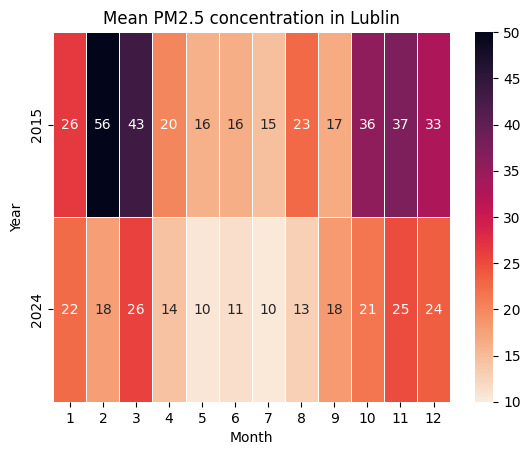

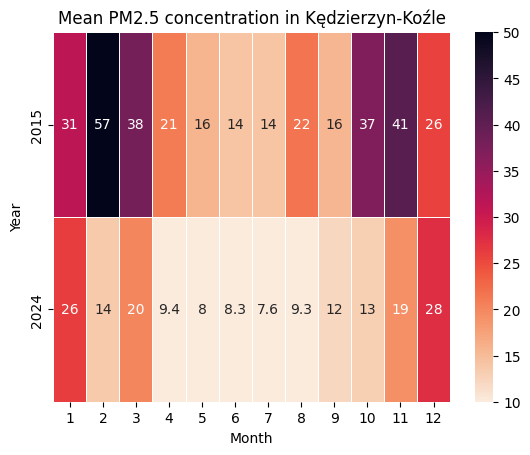

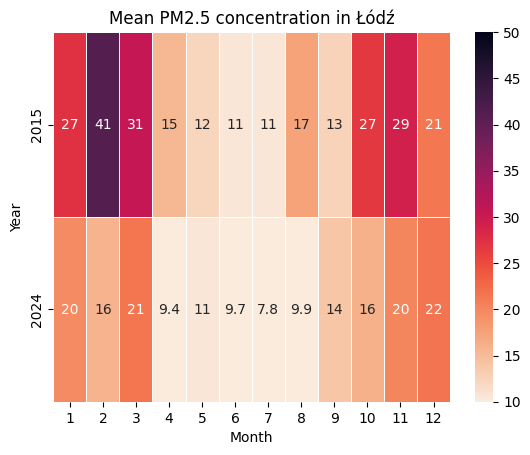

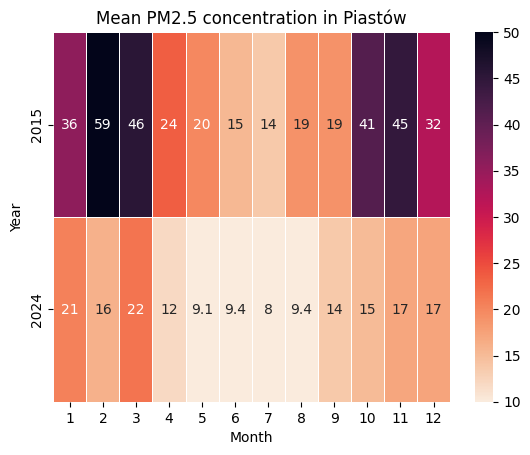

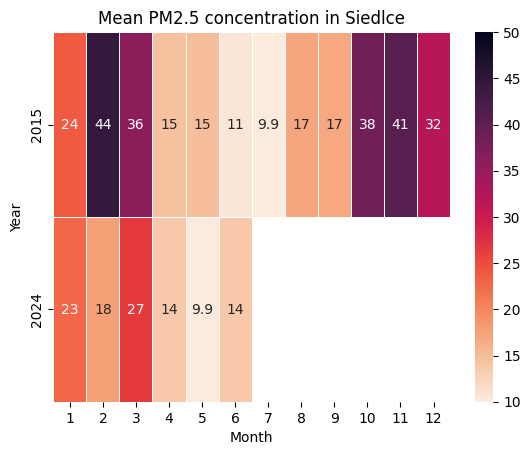

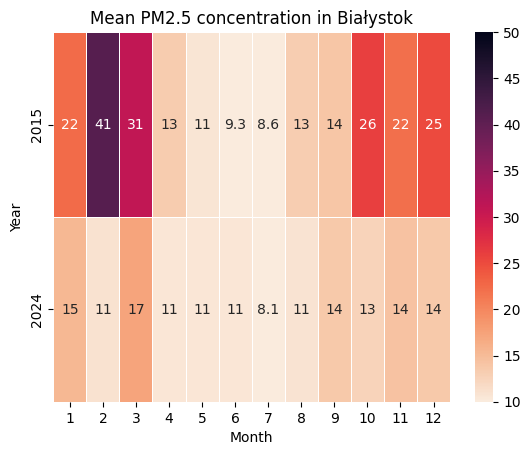

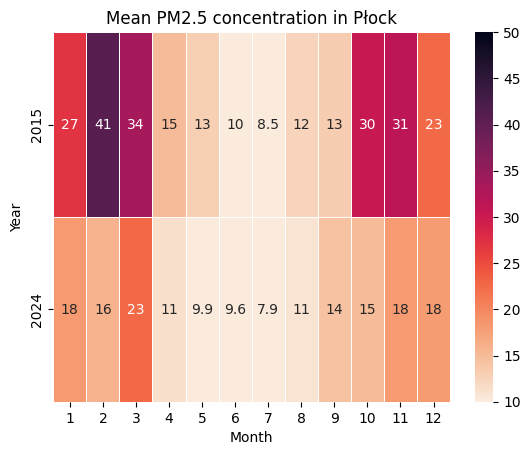

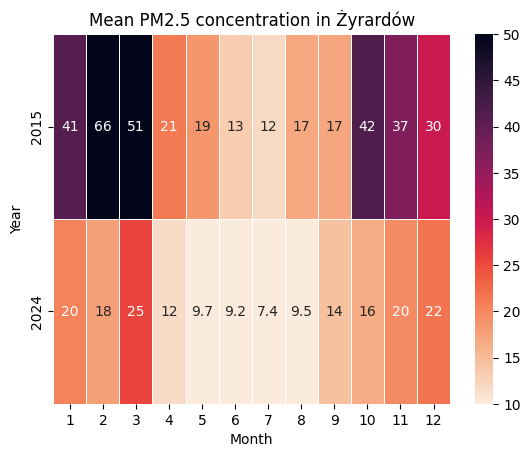

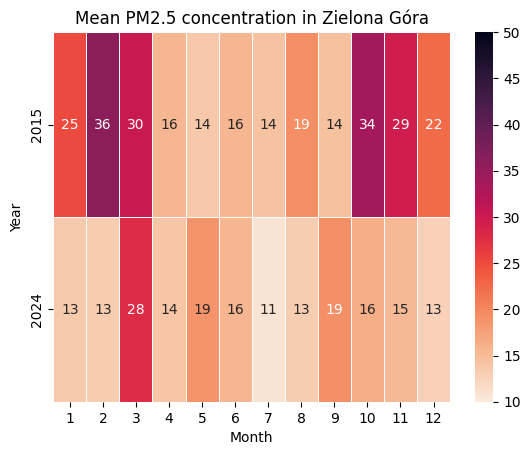

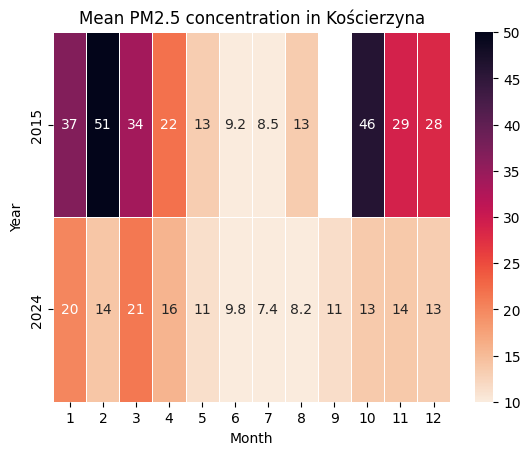

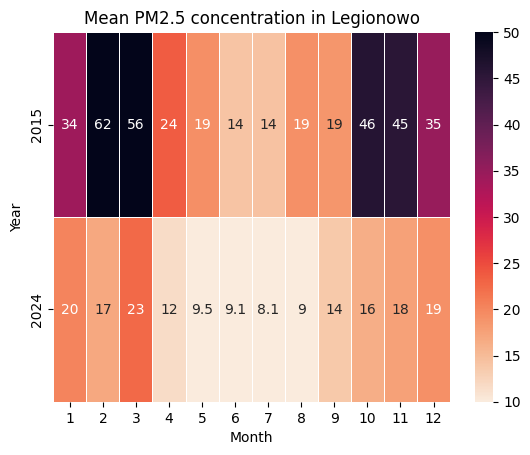

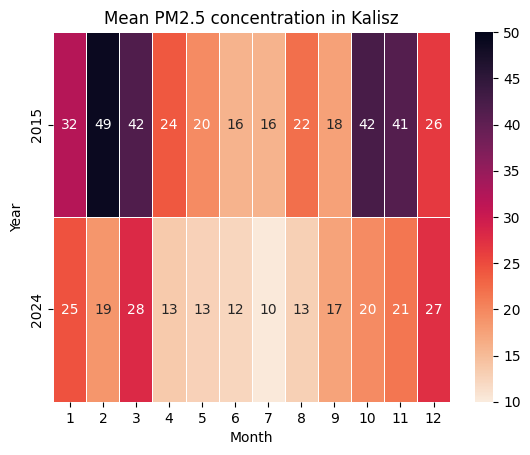

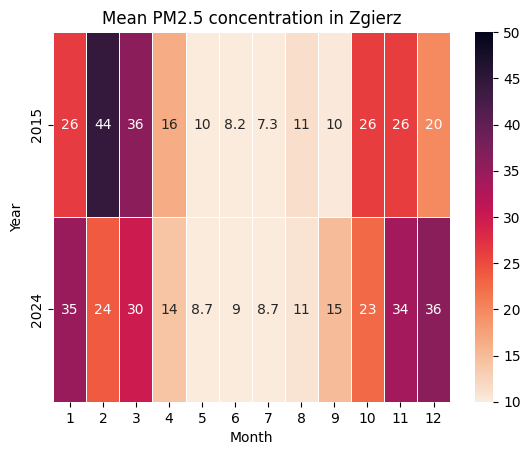

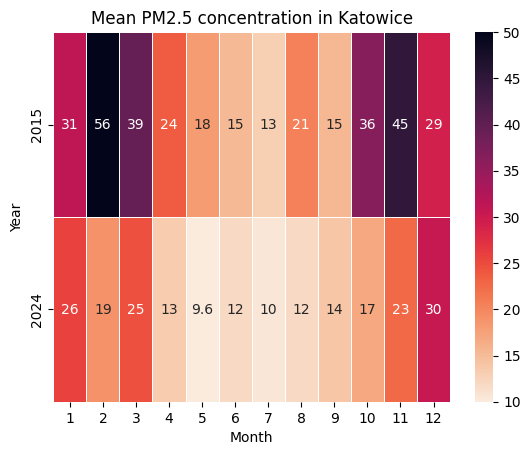

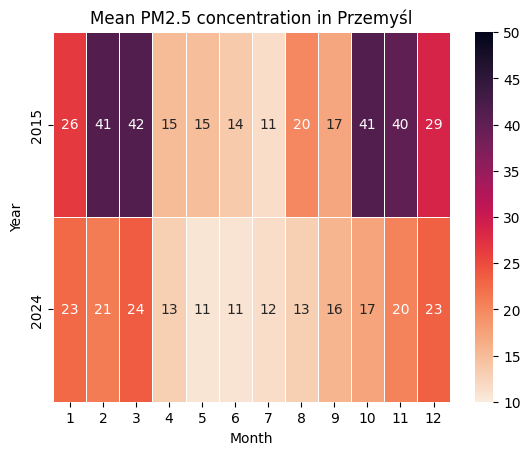

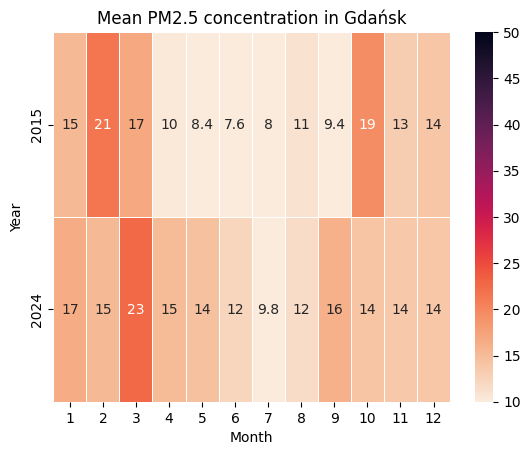

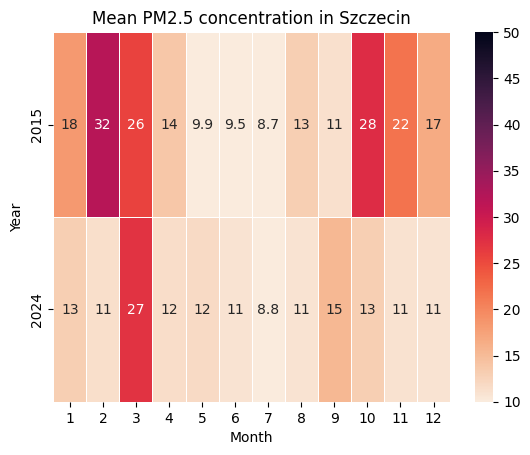

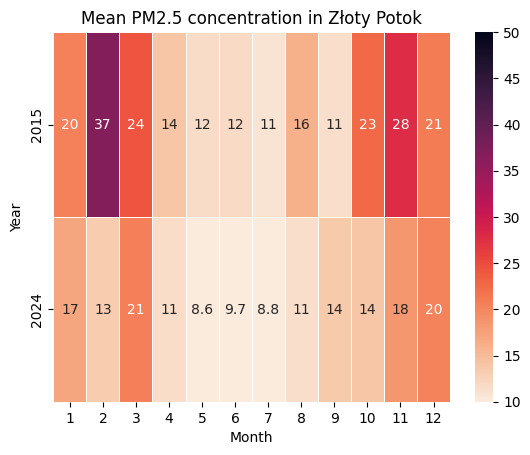

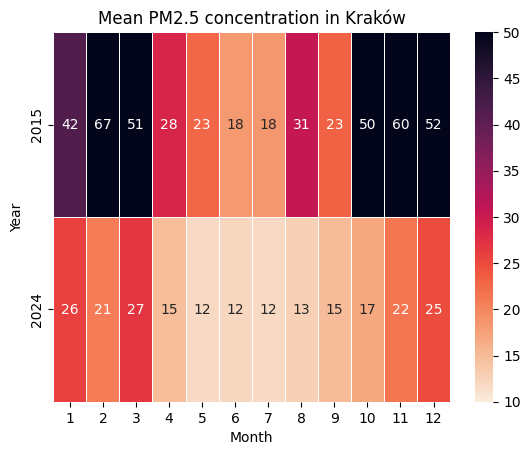

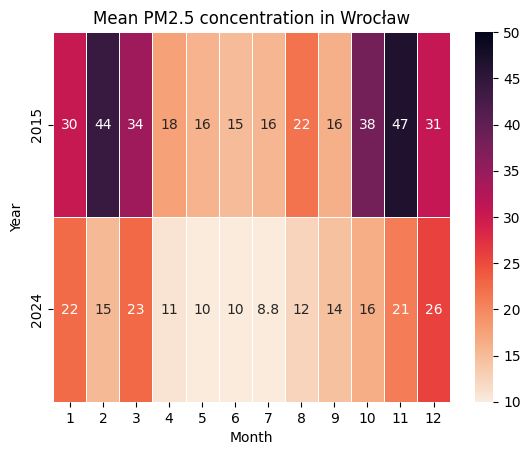

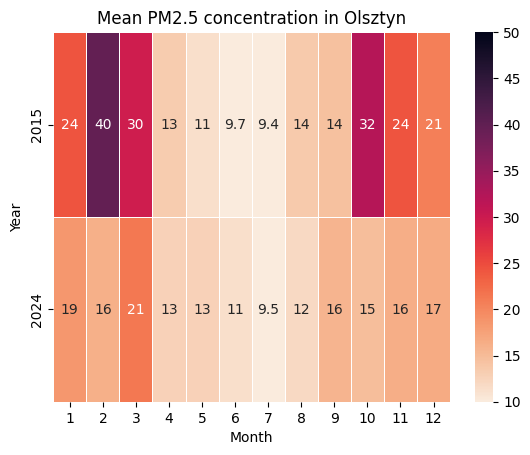

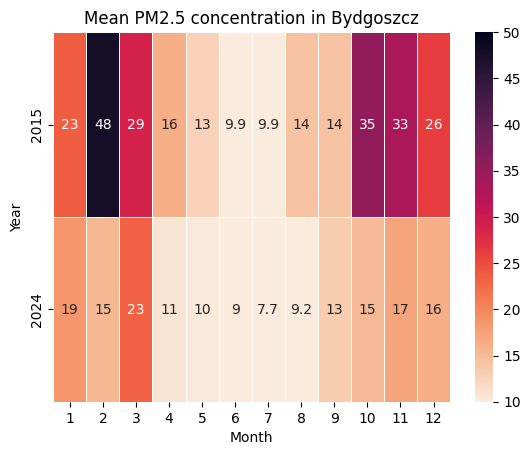

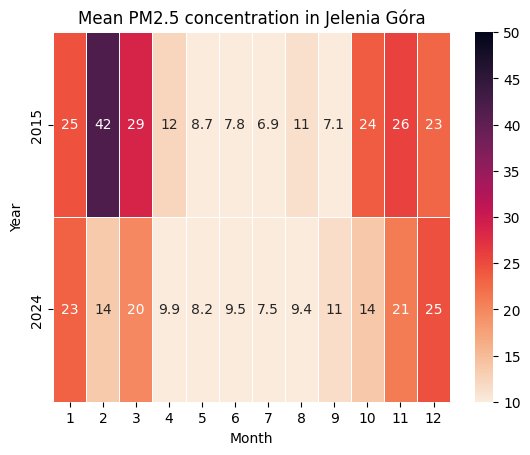

In [34]:
cities = ['Warszawa', 'Katowice']
years = [2015, 2024]
years_heatmaps_cities(df, cities='all', years=years)

Part 4



In [ ]:
daily_mean = 15 

exc2024, total2024 = get_daily_exceedances(df2024, daily_mean)
exc2019, total2019 = get_daily_exceedances(df2019, daily_mean)
exc2014, total2014 = get_daily_exceedances(df2014, daily_mean)

In [ ]:
print("=== 2024 ===")
top3_2024, bottom3_2024 = top3_bottom3_exceedances(exc2024)

print("\n=== 2019 ===")
top3_2019, bottom3_2019 = top3_bottom3_exceedances(exc2019)

print("\n=== 2014 ===")
top3_2014, bottom3_2014 = top3_bottom3_exceedances(exc2014)


=== 2024 ===
Top 3 stations with the most exceedance days:
  LdZgieMielcz: 189
  MpKrakAlKras: 178
  SlKatoKossut: 165

Bottom 3 stations with the fewest exceedance days:
  ZpSzczAndrze: 72
  PdBialUpalna: 76
  MzSiedKonars: 79

=== 2019 ===
Top 3 stations with the most exceedance days:
  MzWarAlNiepo: 299
  MpKrakAlKras: 291
  LdZgieMielcz: 244

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 71
  LuZielKrotka: 108
  PdBialUpalna: 111

=== 2014 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 351
  MzWarAlNiepo: 305
  WpKaliSawick: 292

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 159
  PdBialUpalna: 168
  SlZlotPotLes: 173


In [ ]:
selected_stations = list(top3_2024.index) + list(bottom3_2024.index)
plot_df = pd.DataFrame({
    "2014": exc2014[selected_stations],
    "2019": exc2019[selected_stations],
    "2024": exc2024[selected_stations]
})

plot_df = plot_df.T 
plot_df

,LdZgieMielcz,MpKrakAlKras,SlKatoKossut,ZpSzczAndrze,PdBialUpalna,MzSiedKonars
2014,186,351,254,175,168,245
2019,244,291,213,116,111,190
2024,189,178,165,72,76,79


<Figure size 1200x600 with 0 Axes>

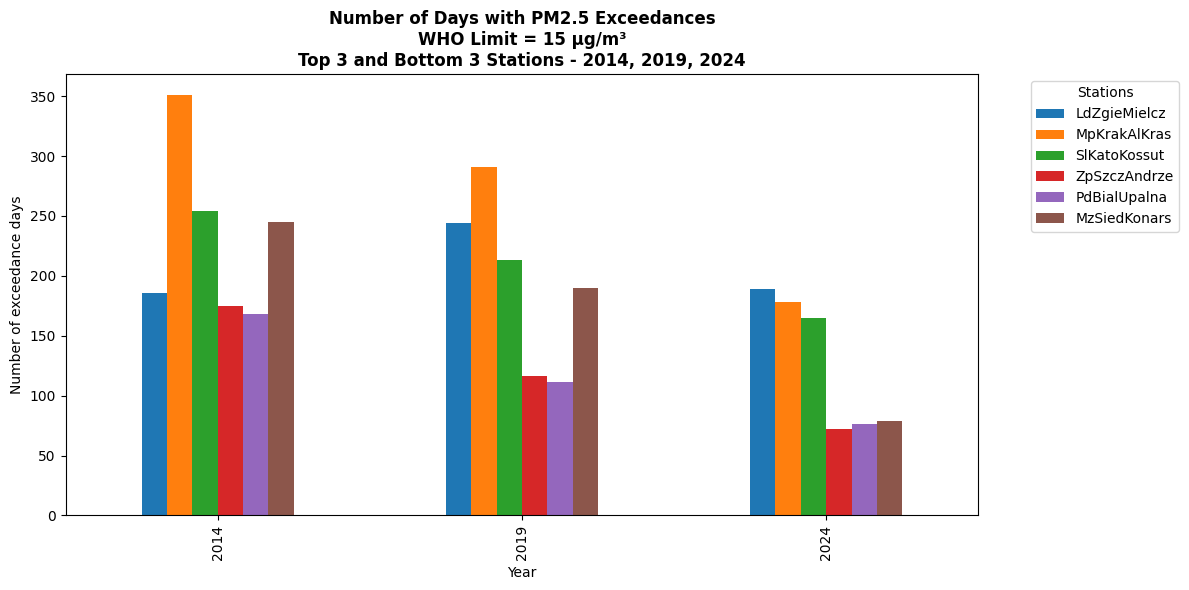

In [ ]:
plt.figure(figsize=(12,6))
plot_df.plot(kind="bar", figsize=(12,6))

plt.title(
    "Number of Days with PM2.5 Exceedances\nWHO Limit = 15 µg/m³\nTop 3 and Bottom 3 Stations - 2014, 2019, 2024",
    fontsize=12,
    fontweight='bold'
)
plt.xlabel("Year")
plt.ylabel("Number of exceedance days")
plt.legend(title="Stations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Interpretation of PM2.5 Exceedance Days (2014, 2019, 2024)

## 1. Top 3 stations with most exceedance days
- **Stations:** `MpKrakAlKras`, `SlKatoKossut`, `LdZgieMielcz`  
- **Trend:**  
  - `MpKrakAlKras`: 351 days (2014) → 291 days (2019) → 178 days (2024)  
  - `SlKatoKossut` and `LdZgieMielcz`: Similar decreasing trend over the years  
- **Interpretation:** Air quality in the most polluted stations has improved, likely due to emission reductions, traffic regulations, or cleaner heating methods.

## 2. Bottom 3 stations with fewest exceedance days
- **Stations:** `ZpSzczAndrze`, `MzSiedKonars`, `MzWarWokalna`  
- **Trend:**  
  - `ZpSzczAndrze`: 176 → 116 → 72  
  - `MzSiedKonars` and `MzWarWokalna`: Similar decreasing trend  
- **Interpretation:** These areas naturally have cleaner air (less traffic, more greenery), and the improvement over time is also visible.

## 3. General observations
- The gap between the top and bottom stations has narrowed over time.  
- Reduction in exceedance days is strongest in 2024, suggesting effective recent air quality policies or favorable meteorological conditions.  
- Air pollution is spatially heterogeneous: urban and industrial centers have far more days exceeding WHO limits than smaller or cleaner areas.


In [ ]:
df2019 = clean_column_names(df2019)
df2024 = clean_column_names(df2024)

print(df2015.columns[:10])
print(df2018.columns[:10])
print(df2021.columns[:10])
print(df2024.columns[:10])

df2015.rename(columns=mapping, inplace=True)
df2018.rename(columns=mapping, inplace=True)
df2021.rename(columns=mapping, inplace=True)
df2024.rename(columns=mapping, inplace=True)

Index(['DsWrocAlWisn', 'KpWiktorowoG', 'KpBydPlPozna', 'KpBydWarszaw',
       'KpToruDziewu', 'LdLodzCzerni', 'LdZgieMielcz', 'LuZielKrotka',
       'MpKrakAlKras', 'MpKrakBujaka'],
      dtype='object', name=0)
Index(['DsDusznikMOB', 'DsJaworMOB', 'DsJelGorOgin', 'DsWrocAlWisn',
       'DsWrocWybCon', 'KpBydPlPozna', 'KpMogiNowMOB', 'KpToruDziewu',
       'KpWloclOkrze', 'LbLubObywate'],
      dtype='object', name=5)
Index(['DsChojnowMalMOB', 'DsJelGorOgin', 'DsKlodzSzkol', 'DsKudowaSzkoMOB',
       'DsWrocAlWisn', 'DsWrocWybCon', 'KpBydPlPozna', 'KpBydWarszaw',
       'KpNaklWawrzy', 'KpSwiecJPawlMOB'],
      dtype='object', name=5)


In [19]:
# Finding common stations
common_stations = list(set(df2014.columns) & set(df2019.columns) & set(df2024.columns))
print(f"Liczba wspólnych stacji: {len(common_stations)}")

df2014 = df2014[common_stations]
df2019 = df2019[common_stations]
df2024 = df2024[common_stations]

Liczba wspólnych stacji: 24


`Managing NA values`

We did not use `fill_na` function because it led to lack of data in examined stations. To do it properly we would create clusters of stations based on similiar densities of *PM2.5* in different years, then we would fill out missing values by averaging month values in other stations in the same cluster. 

In [ ]:
# combining data
combined = pd.concat([df2015, df2018, df2021, df2024]).sort_index()
combined = combined.dropna(how="all")

combined.index = pd.to_datetime(combined.index)
combined = combined.sort_index()

print(combined.shape)
print(f"\nCombined df starts on: \n{combined.index.min()} \nand ends on: \n{combined.index.max()}")
# combined = fill_na(combined)
combined.to_csv(PATH_DATA / "PM25_combined_2015_2018_2021_2024.csv")

df = combined

(26304, 24)

Combined df starts on: 
2014-01-01 00:00:00 
and ends on: 
2024-12-31 23:00:00


# Parts 2 and 3

## Results 
From regression plot `Mean PM2.5 concentration in ['Warszawa', 'Katowice']` we can see a significant reduction in PM2.5 concentrations, especially during the heating season.

In the heatmaps, the minimum value was set to $10,\mu\mathrm{g/m^3}$ because this is the target annual limit that EU countries are expected to meet by 2030 [1]. The plots show that the analysed cities do not yet meet this criterion, and the exceedances are particularly high in cities located in the southern part of Poland.

## Analysis
**Limits**

For 2020, the required annual limit for PM2.5 was set at $20,\mu\mathrm{g/m^3}$ [2]. Based on the `heatmaps`, most cities appear to have reached this limit by 2024.

**Reduction**

The most substantial reductions occur during the heating seasons. This is because one of the main sources of PM2.5 in Poland is the combustion of solid fuels in low-quality stoves and old boilers. In recent years many of these have been replaced or phased out, which directly contributes to the observed decline in PM2.5 concentrations [3].


# Bibliography:

[1] [Progress and policies to achieve the zero pollution action plan and EU 2024/2881 PM2.5 targets in Northern Italy](https://www.nature.com/articles/s41598-025-17176-x)

[2] [Poziomy dopuszczalne zanieczyszczeń w powietrzu ze względu na ochronę zdrowia ludzi i ochronę roślin, terminy ich osiągnięcia oraz okresy, dla których uśrednia się wyniki pomiarów - gios.gov.pl](https://powietrze.gios.gov.pl/pjp/content/annual_assessment_air_acceptable_level)

[3] [Dbamy o jakość powietrza w Polsce. Wprowadzamy zmiany w wymaganiach jakościowych dla paliw stałych [ROZPORZĄDZENIE] - gov.pl](https://www.gov.pl/web/klimat/dbamy-o-jakosc-powietrza-w-polsce-wprowadzamy-zmiany-w-wymaganiach-jakosciowych-dla-paliw-stalych-rozporzadzenie)

Part  2

There is no significant changes (not checked statistically) between 2014 and 2015 year

In [ ]:
# load data
file_name = "PM25_combined_2015_2018_2021_2024.csv"
df = pd.read_csv(PATH_DATA / file_name, index_col=0, parse_dates=True)

In [21]:
# part with mean values 
time_to_month(df) 

,ZpSzczPilsud,MzLegZegrzyn,DsWrocAlWisn,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,LuZielKrotka,MzPlocMiReja,ZpSzczAndrze,PdBialUpalna,...,MzRadTochter,LdLodzCzerni,MzWarWokalna,SlZlotPotLes,PmGdaLeczkow,LdZgieMielcz,WmOlsPuszkin,MpKrakBulwar,SlKatoKossut,MpKrakAlKras
2014-01-01,32.398922,39.815343,42.797037,36.824947,42.847025,32.047507,42.946602,31.855108,32.280684,22.039498,...,40.485457,35.407387,28.370219,25.105590,15.574259,31.518199,25.550652,47.241565,47.531587,60.350806
2014-02-01,32.134731,62.753609,38.649351,55.307686,43.510433,51.465929,33.748299,50.473512,22.655796,34.478514,...,53.218289,45.704915,41.428399,32.390863,25.712251,46.359747,40.799969,62.591045,57.502297,86.708955
2014-03-01,37.271277,47.863719,36.125000,45.742247,45.567347,30.040347,37.276358,31.600595,26.832721,28.669522,...,43.391626,35.259896,31.348221,21.564371,15.098253,36.861373,24.921921,39.900135,42.855405,54.498652
2014-04-01,22.124302,27.777273,25.353659,26.113754,29.082759,20.732240,23.778929,20.852646,15.903186,18.687154,...,27.699527,23.474251,21.101069,14.539735,13.423333,18.767278,17.748875,24.543417,26.925608,34.743300
2014-05-01,12.351079,14.622747,14.963925,14.187658,16.551867,10.376133,12.545727,12.079019,10.925751,9.895402,...,14.581354,16.407493,13.206132,8.812585,10.499194,11.068347,13.588730,14.522849,14.893387,19.547718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,12.771909,9.005376,11.574059,9.493405,9.262936,12.971640,13.275719,10.782907,8.803360,10.822191,...,11.917204,9.851478,8.542896,11.338575,11.628857,10.932571,11.946774,12.918683,11.948790,12.731565
2024-09-01,16.876111,13.684167,13.114571,14.392222,12.187442,15.655602,19.249787,14.335278,14.048603,13.641168,...,15.653652,13.984844,12.797986,13.546314,16.022270,14.973056,15.639441,14.665833,13.956111,15.278442
2024-10-01,16.222581,16.339300,15.125575,16.474124,12.995296,17.301344,16.264714,14.956081,9.922207,12.582111,...,17.613525,16.039838,14.474684,13.939651,14.074832,22.542396,14.791233,16.725403,16.799194,17.136022
2024-11-01,12.273194,17.635286,20.102646,19.610987,19.244861,20.348472,15.278151,18.126287,9.608472,14.239888,...,22.847539,20.072308,15.920480,18.464714,13.743611,33.866328,16.302778,20.898750,22.538056,22.123889


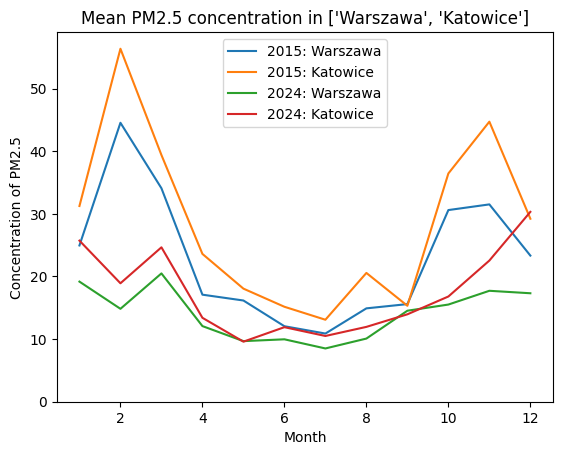

In [38]:
# plot of PM2.5 concentration 
cities = ['Warszawa', 'Katowice']
years = [2015, 2024]
years_trend_cities(df, cities=cities, years=years)

Part 3

There is 25


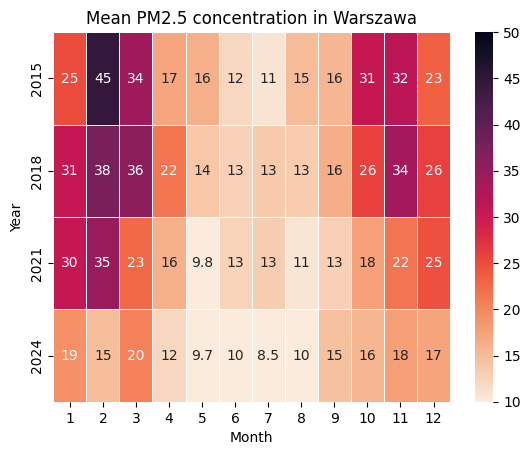

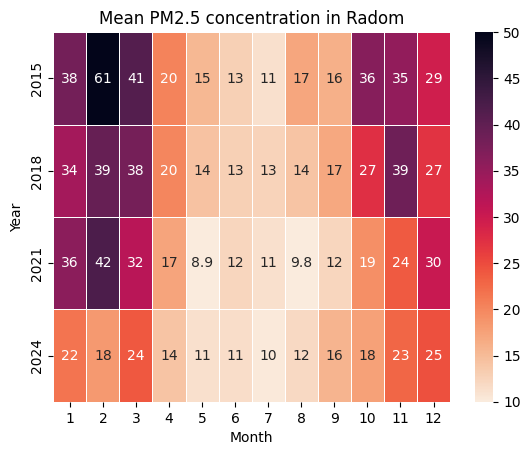

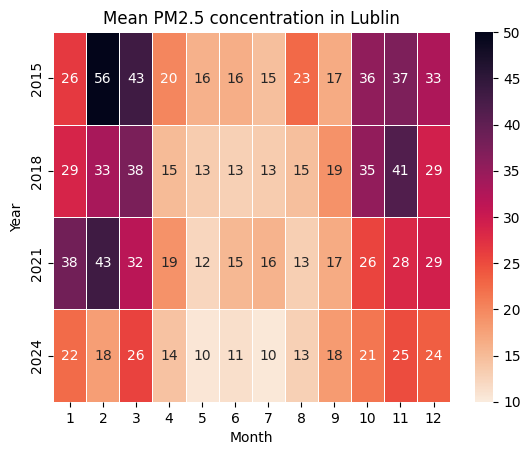

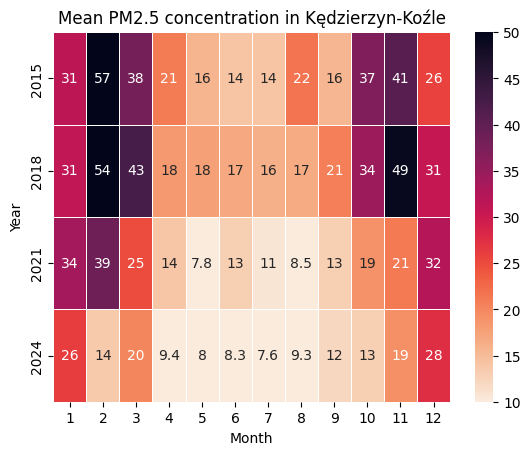

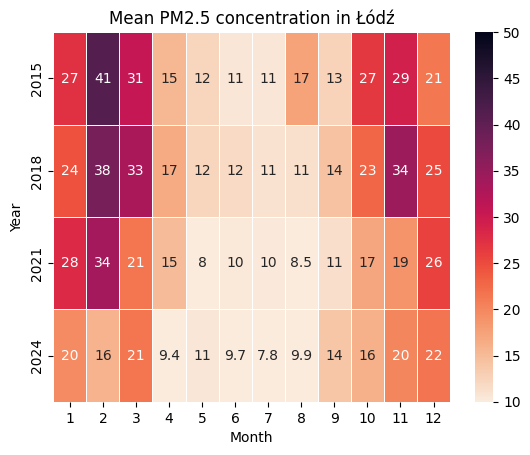

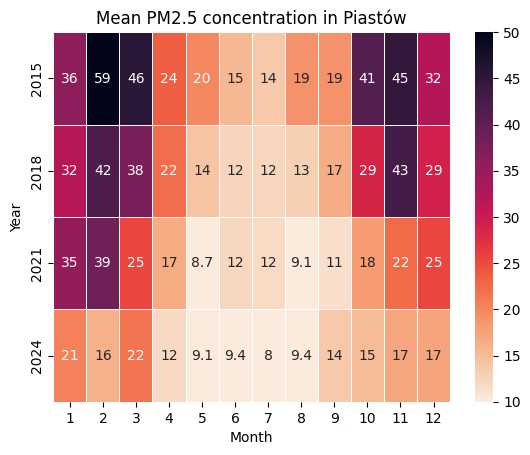

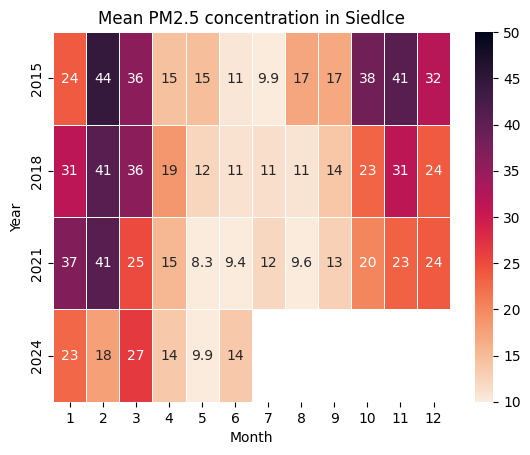

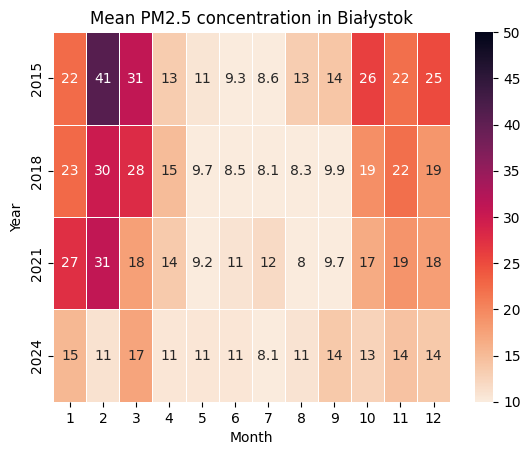

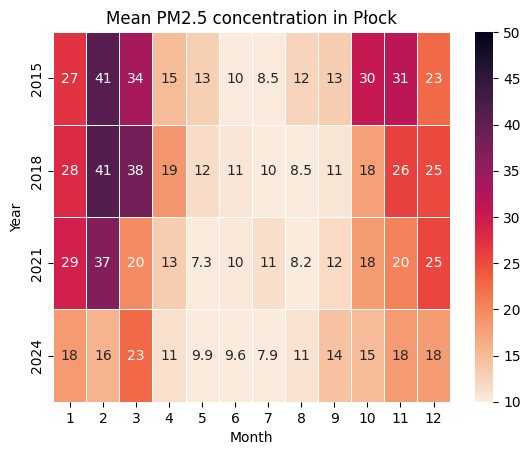

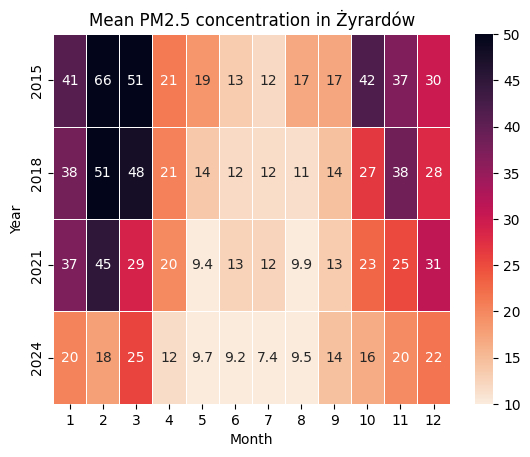

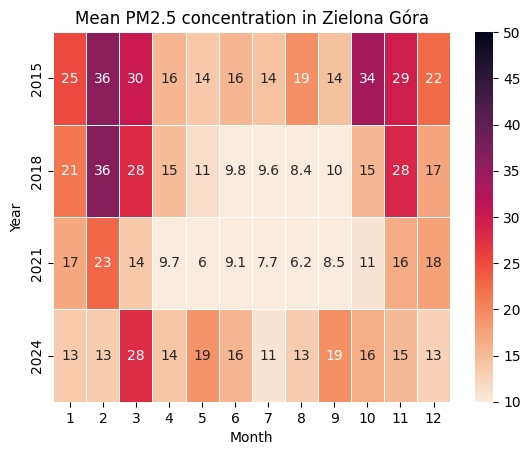

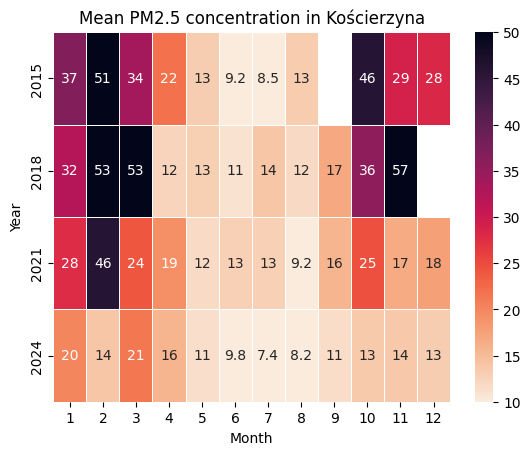

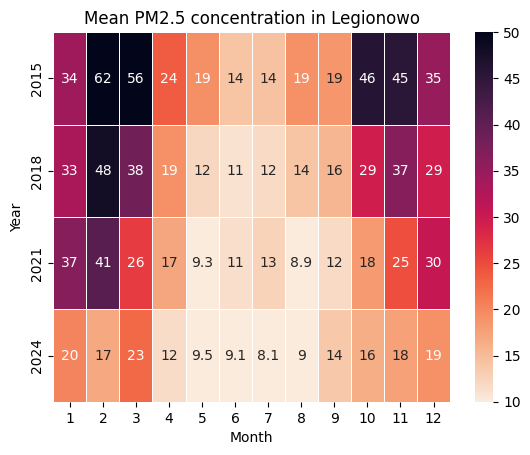

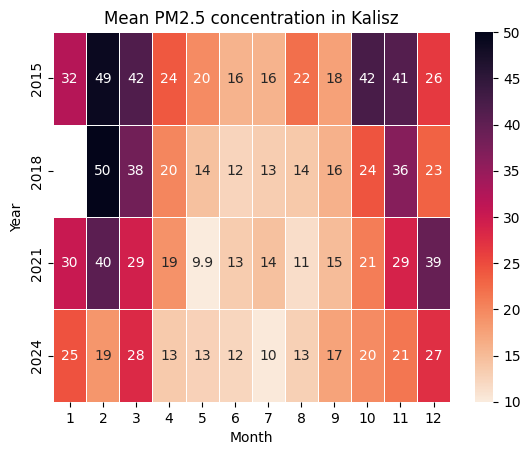

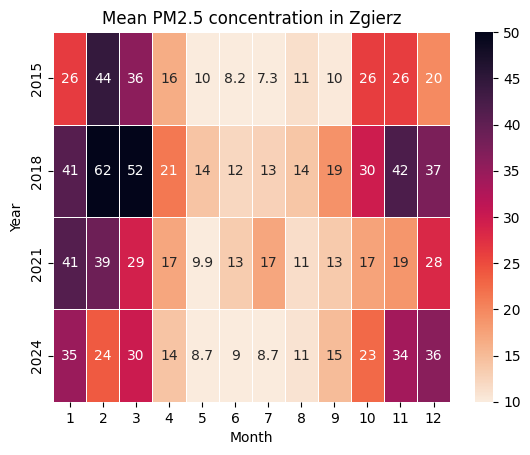

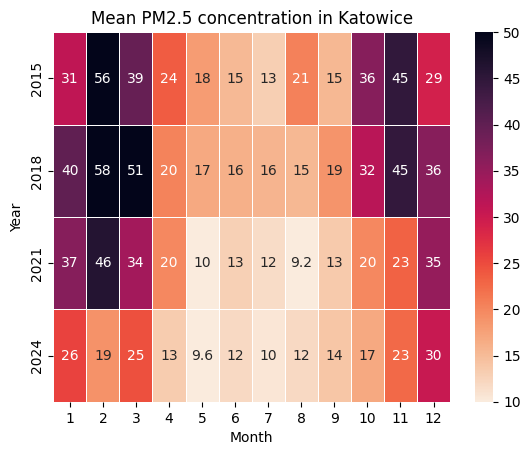

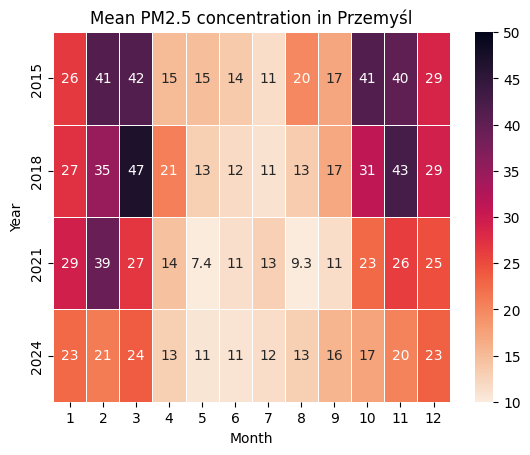

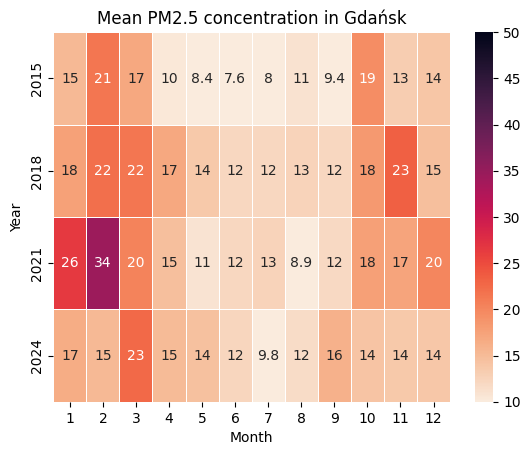

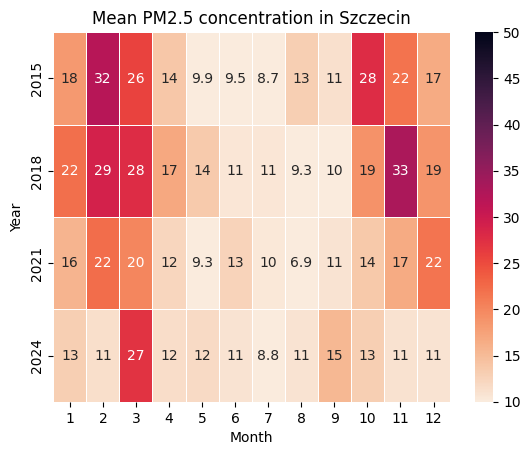

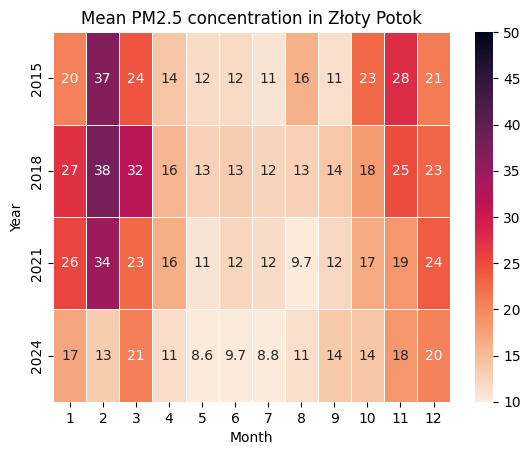

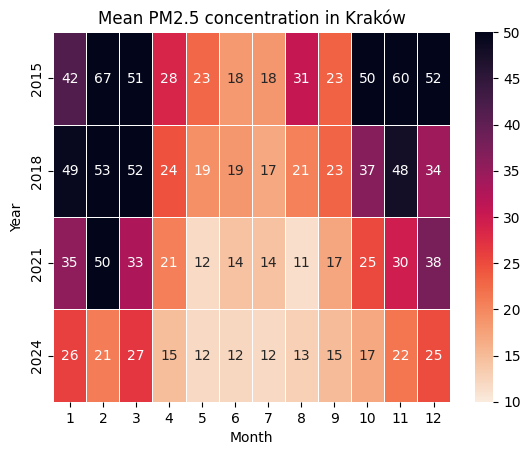

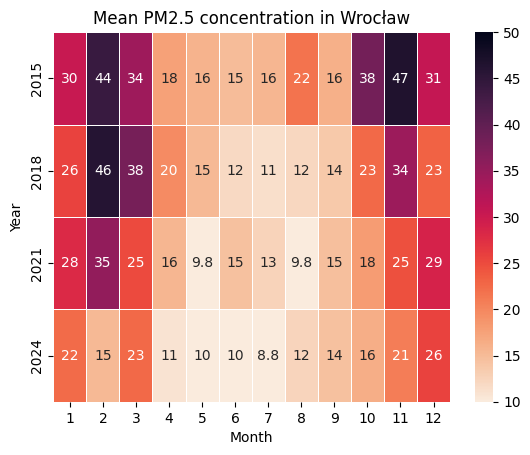

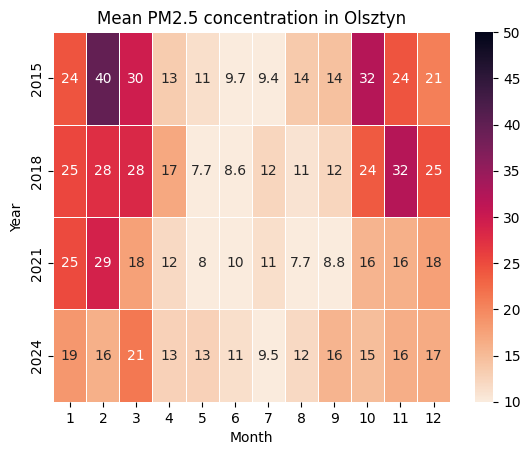

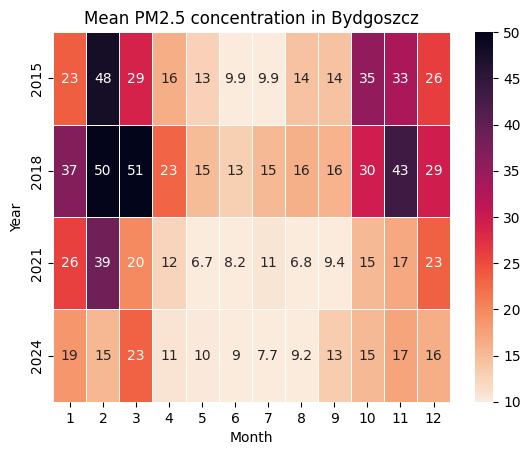

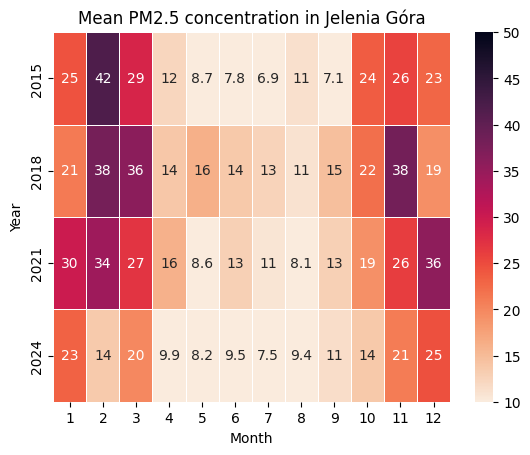

In [39]:
cities = ['Warszawa', 'Katowice']
years = [2015, 2018, 2021, 2024]
years_heatmaps_cities(df, cities='all', years=years)

Part 4



In [41]:
daily_mean = 15 

exc2024, total2024 = get_daily_exceedances(df2024, daily_mean)
exc2021, total2021 = get_daily_exceedances(df2021, daily_mean)
exc2018, total2018 = get_daily_exceedances(df2018, daily_mean)
exc2015, total2015 = get_daily_exceedances(df2015, daily_mean)

In [42]:
print("=== 2024 ===")
top3_2024, bottom3_2024 = top3_bottom3_exceedances(exc2024)

print("\n=== 2021 ===")
top3_2021, bottom3_2021 = top3_bottom3_exceedances(exc2021)

print("\n=== 2018 ===")
top3_2018, bottom3_2018 = top3_bottom3_exceedances(exc2018)

print("\n=== 2015 ===")
top3_2015, bottom3_2015 = top3_bottom3_exceedances(exc2015)

=== 2024 ===
Top 3 stations with the most exceedance days:
  LdZgieMielcz: 189
  MpKrakAlKras: 178
  LbLubObywate: 170

Bottom 3 stations with the fewest exceedance days:
  ZpSzczAndrze: 72
  PdBialUpalna: 76
  MzSiedKonars: 79

=== 2021 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 250
  LbLubObywate: 246
  MzWarAlNiepo: 224

Bottom 3 stations with the fewest exceedance days:
  LuZielKrotka: 92
  ZpSzczAndrze: 95
  ZpSzczPilsud: 117

=== 2018 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 343
  SlKatoKossut: 285
  OpKKozBSmial: 281

Bottom 3 stations with the fewest exceedance days:
  ZpSzczAndrze: 106
  PdBialUpalna: 135
  PmKosTargowa: 143

=== 2015 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 344
  DsWrocAlWisn: 308
  MzPiasPulask: 297

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 97
  ZpSzczAndrze: 113
  DsJelGorOgin: 144


In [43]:
selected_stations = list(top3_2024.index) + list(bottom3_2024.index)
plot_df = pd.DataFrame({
    "2015": exc2015[selected_stations],
    "2018": exc2018[selected_stations],
    "2021": exc2021[selected_stations],
    "2024": exc2024[selected_stations]
})

plot_df = plot_df.T 
plot_df

,LdZgieMielcz,MpKrakAlKras,LbLubObywate,ZpSzczAndrze,PdBialUpalna,MzSiedKonars
2015,175,344,276,113,158,229
2018,251,343,234,106,135,205
2021,201,250,246,95,137,177
2024,189,178,170,72,76,79


<Figure size 1200x600 with 0 Axes>

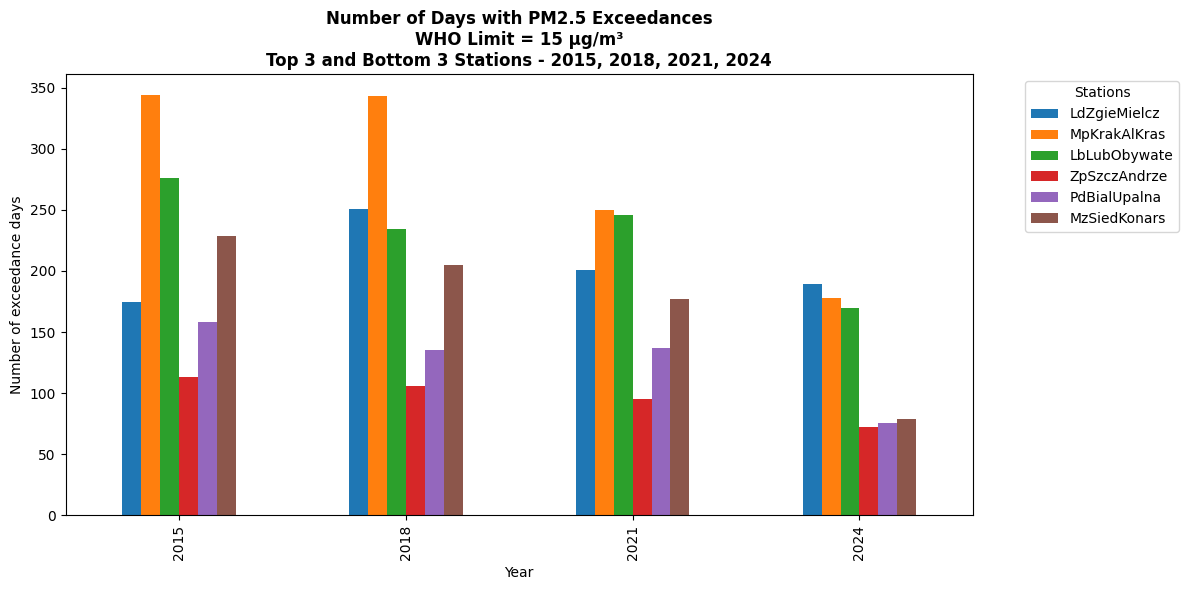

In [44]:
plt.figure(figsize=(12,6))
plot_df.plot(kind="bar", figsize=(12,6))

plt.title(
    "Number of Days with PM2.5 Exceedances\nWHO Limit = 15 µg/m³\nTop 3 and Bottom 3 Stations - 2015, 2018, 2021, 2024",
    fontsize=12,
    fontweight='bold'
)
plt.xlabel("Year")
plt.ylabel("Number of exceedance days")
plt.legend(title="Stations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()